In [1]:
# importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# decimal should be up to only 2 decimals


In [2]:
# import data
customer_demographic = pd.read_csv('CustomerDemographic.csv',header = 1)
customer_address = pd.read_csv('CustomerAddress1.csv',header = 1)
Transactions = pd.read_csv('Transactions.csv',header = 1)

In [3]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,02/25/2017,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,05/21/2017,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,10/16/2017,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,08/31/2017,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,10/01/2017,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [5]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,Unnamed: 10,owns_car,tenure
0,1.0,Laraine,Medendorp,F,93.0,12-10-1953,Executive Secretary,Health,Mass Customer,N,Yes,NaN,11.0
1,2.0,Eli,Bockman,Male,81.0,16-12-1980,Administrative Officer,Financial Services,Mass Customer,N,Yes,Yes,16.0
2,3.0,Arlin,Dearle,Male,61.0,20-01-1954,Recruiting Manager,Property,Mass Customer,N,Yes,Yes,15.0
3,4.0,Talbot,NaN,Male,33.0,03-10-1961,NaN,IT,Mass Customer,N,Yes,No,7.0
4,5.0,Sheila-kathryn,Calton,Female,56.0,13-05-1977,Senior Editor,NaN,Affluent Customer,N,Yes,Yes,8.0


In [6]:
# Data exploration
Transactions.drop('transaction_id',inplace = True,axis = 1)



In [7]:
Transactions.dropna(how = 'any',inplace = True)

In [8]:
Transactions.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,2,2950,02/25/2017,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,3,3120,05/21/2017,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,37,402,10/16/2017,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,88,3135,08/31/2017,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,78,787,10/01/2017,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [9]:
Transactions = Transactions[(Transactions['online_order']==1.0)&(Transactions['order_status']=='Approved')]

In [10]:
Transactions.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,3,3120,05/21/2017,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
4,78,787,10/01/2017,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
5,25,2339,03/08/2017,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031.0
6,22,1542,04/21/2017,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
9,12,3262,08/30/2017,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0


In [11]:
Transactions.dtypes

product_id                   int64
customer_id                  int64
transaction_date            object
online_order               float64
order_status                object
brand                       object
product_line                object
product_class               object
product_size                object
list_price                 float64
standard_cost              float64
product_first_sold_date    float64
dtype: object

In [12]:
Transactions['month'] = pd.to_datetime(Transactions['transaction_date']).dt.month

In [13]:
Transactions =Transactions.drop('transaction_date',axis = 1).head()

In [14]:
Transactions.set_index('customer_id')

,product_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,month
customer_id,,,,,,,,,,,
3120,3,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,5
787,78,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,10
2339,25,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031.0,3
1542,22,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,4
3262,12,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0,8


In [15]:
Transactions.isnull().sum()

product_id                 0
customer_id                0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
month                      0
dtype: int64

In [16]:
# Customer Dempgraphic
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,Unnamed: 10,owns_car,tenure
0,1.0,Laraine,Medendorp,F,93.0,12-10-1953,Executive Secretary,Health,Mass Customer,N,Yes,NaN,11.0
1,2.0,Eli,Bockman,Male,81.0,16-12-1980,Administrative Officer,Financial Services,Mass Customer,N,Yes,Yes,16.0
2,3.0,Arlin,Dearle,Male,61.0,20-01-1954,Recruiting Manager,Property,Mass Customer,N,Yes,Yes,15.0
3,4.0,Talbot,NaN,Male,33.0,03-10-1961,NaN,IT,Mass Customer,N,Yes,No,7.0
4,5.0,Sheila-kathryn,Calton,Female,56.0,13-05-1977,Senior Editor,NaN,Affluent Customer,N,Yes,Yes,8.0


In [17]:

customer_demographic.drop('Unnamed: 10',inplace =True,axis =1)

In [18]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1.0,Laraine,Medendorp,F,93.0,12-10-1953,Executive Secretary,Health,Mass Customer,N,NaN,11.0
1,2.0,Eli,Bockman,Male,81.0,16-12-1980,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3.0,Arlin,Dearle,Male,61.0,20-01-1954,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4.0,Talbot,NaN,Male,33.0,03-10-1961,NaN,IT,Mass Customer,N,No,7.0
4,5.0,Sheila-kathryn,Calton,Female,56.0,13-05-1977,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [19]:
customer_demographic.dropna(how = 'any',inplace = True)

In [20]:
# data types
customer_demographic['tenure'] = customer_demographic['tenure'].astype('int')
customer_demographic['past_3_year_bike_related_purchases'] = customer_demographic['past_3_years_bike_related_purchases'].astype('int')
customer_demographic['customer_id'] = customer_demographic['customer_id'].astype('int')

In [21]:
customer_demographic.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
past_3_year_bike_related_purchases     0
dtype: int64

In [22]:
customer_demographic['name'] = customer_demographic['first_name']+' '+customer_demographic['last_name']

In [23]:
customer_demographic.drop(['first_name','last_name'],axis = 1,inplace = True)
customer_demographic.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,past_3_year_bike_related_purchases,name
1,2,Male,81.0,16-12-1980,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,81,Eli Bockman
2,3,Male,61.0,20-01-1954,Recruiting Manager,Property,Mass Customer,N,Yes,15,61,Arlin Dearle
8,9,Female,97.0,10-03-1973,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8,97,Mala Lind
9,10,Female,49.0,11-10-1988,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20,49,Fiorenze Birdall
11,12,Male,58.0,21-07-1994,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8,58,Sawyere Flattman


In [24]:
# customer_address
customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [25]:
customer_address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [26]:
# dropping the country column since it does not add value to our analysis since all the data has beeen from Austraila .there is no other variable.

customer_address.drop('country',inplace = True,axis =1 )

In [27]:
final = pd.concat([customer_address,customer_demographic,Transactions],axis =1 ,join = 'inner')


In [28]:
final_1 = Transactions.merge(customer_demographic,on = None )

In [29]:
final_1

,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,past_3_year_bike_related_purchases,name
0,3,3120,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,...,89.0,04-02-1979,Clinical Specialist,Health,Mass Customer,N,Yes,10,89,Lauree O'Donnell
1,25,2339,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,...,3.0,28-12-1958,Web Designer II,Property,Affluent Customer,N,Yes,16,3,Damien Haddeston
2,22,1542,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,...,56.0,27-07-1978,Food Chemist,Health,Mass Customer,N,Yes,12,56,Sanders Fernyhough
3,12,3262,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,...,65.0,14-10-1959,Product Engineer,Entertainment,Mass Customer,N,No,12,65,Maynord L'Episcopi


In [30]:
import warnings
warnings.filterwarnings('ignore')

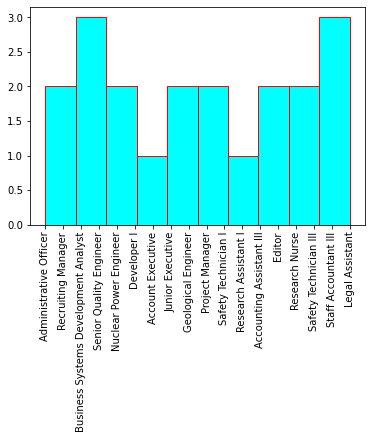

In [31]:
# graphs
plt.hist(customer_demographic['job_title'].head(20),edgecolor = 'red', color ='cyan',bins =10)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:>

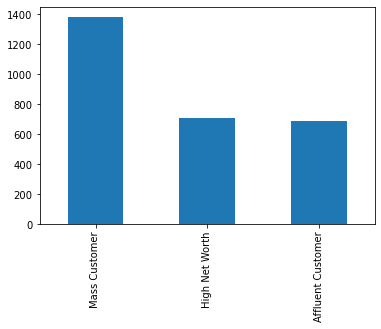

In [33]:
customer_demographic['wealth_segment'].value_counts().plot.bar()